# Perkenalan

## Team

1. Nichoulaus Verdhy P - PYTN-KS011-023
2. Tassyirifiyya - PYTN-KS011-012
3. Isma - PYTN-KS011-008

Python for Data Science - Studi Independen - Kampus Merdeka

# Latar Belakang

Dalam industri perbankan dan kartu kredit, pemahaman yang mendalam tentang perilaku pengguna kartu kredit sangat penting untuk mengembangkan strategi pemasaran yang efektif. Segmentasi pelanggan memainkan peran kunci dalam memahami kelompok-kelompok pelanggan yang berbeda dan merancang taktik pemasaran yang tepat untuk setiap kelompok. Dataset yang diberikan adalah dataset sampel yang merangkum perilaku penggunaan kartu kredit sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir.

Tujuan dari kasus ini adalah untuk mengembangkan segmentasi pelanggan yang dapat membantu dalam mengidentifikasi pola dan karakteristik perilaku pengguna kartu kredit. Dengan pemahaman yang lebih baik tentang profil pelanggan dan preferensi mereka, perusahaan dapat merancang kampanye pemasaran yang lebih personal, meningkatkan retensi pelanggan, dan mengoptimalkan penjualan produk dan layanan.

Dataset ini terdiri dari berbagai variabel perilaku pengguna kartu kredit, yang mencakup informasi seperti saldo akun, frekuensi pembelian, jumlah pembayaran, dan masa penggunaan kartu kredit. Dengan menganalisis variabel-variabel ini, kita dapat mengidentifikasi pola pembelian, preferensi pembayaran, dan durasi penggunaan kartu kredit oleh setiap pelanggan.

Dengan memanfaatkan teknik clustering, kita dapat mengelompokkan pelanggan berdasarkan perilaku dan karakteristik yang serupa. Hal ini akan membantu perusahaan dalam mengembangkan strategi pemasaran yang lebih terfokus dan memadai untuk setiap kelompok pelanggan. Misalnya, pelanggan dengan kecenderungan pembelian yang tinggi dan sering membayar penuh setiap bulan dapat diberikan penawaran spesial untuk program loyalitas, sementara pelanggan dengan pembelian yang jarang dan pembayaran minimum dapat diberikan penawaran untuk meningkatkan penggunaan kartu mereka.

Dengan demikian, analisis segmentasi pelanggan berdasarkan dataset ini dapat membantu perusahaan dalam mengoptimalkan penggunaan sumber daya pemasaran, meningkatkan retensi pelanggan, dan meningkatkan pendapatan melalui strategi yang lebih terarah dan personal.

## Objektif
● Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn

● Mampu mempersiapkan data untuk digunakan dalam Clustering

● Mampu mengimplementasikan Clustering pada data yang diberikan

# Import Library

In [264]:
#untuk dataframe
import pandas as pd
import numpy as np

#untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go

#mengatur display biar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

#preprocessing
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

#modeling
from sklearn.cluster import KMeans #melakukan clustering dengan k-means
from sklearn.metrics import silhouette_score #menghitung skor silhoute

import warnings
warnings.filterwarnings("ignore")

# Data Loading

## Memanggil data set

Memanggil data set menggunakan pd.read_csv

In [265]:
df = pd.read_csv("CC GENERAL.csv")

In [266]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [267]:
df.drop("CUST_ID",axis=1,inplace=True)

## Melihat ukuran data ( baris, kolom)

Setelah memanggil data, kita melihat ukuran data yang nantinya kita pakai

In [268]:
df.shape

(8950, 17)

Untuk jumlah datanya terdapat 8950 baris dan 18 kolom yang tersedia pada dataset

## Melihat informasi kolom

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

## Penjelasan Kolom

Attribute Information:
1. CUSTID - Identifikasi Pemegang Kartu Kredit (Kategori)

2. BALANCE - Jumlah saldo yang tersisa di akun untuk melakukan pembelian 

3. BALANCEFREQUENCY - Seberapa sering saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = jarang diperbarui)

4. PURCHASES - Jumlah pembelian yang dilakukan dari akun

5. ONEOFFPURCHASES - Jumlah pembelian maksimum yang dilakukan sekaligus

6. INSTALLMENTSPURCHASES - Jumlah pembelian yang dilakukan secara cicilan

7. CASHADVANCE - Uang muka yang diberikan oleh pengguna

8. PURCHASESFREQUENCY - Seberapa sering pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = jarang dibeli)

9. ONEOFFPURCHASESFREQUENCY - Seberapa sering pembelian dilakukan sekaligus (1 = sering dibeli, 0 = jarang dibeli)

10. PURCHASESINSTALLMENTSFREQUENCY - Seberapa sering pembelian dilakukan sekaligus (1 = sering dibeli, 0 = jarang dibeli)

11. CASHADVANCEFREQUENCY - Seberapa sering pembelian dilakukan secara cicilan (1 = sering dilakukan, 0 = jarang dilakukan)

12. CASHADVANCETRX - Seberapa sering uang muka dibayarkan

13. PURCHASESTRX - Jumlah transaksi yang dilakukan dengan "Uang Muka"

14. CREDITLIMIT - Jumlah transaksi pembelian yang dilakukan

15. PAYMENTS - Batas Kartu Kredit untuk pengguna

16. MINIMUM_PAYMENTS - Jumlah pembayaran minimum yang dilakukan oleh pengguna

17. PRCFULLPAYMENT - Persentase pembayaran penuh yang dilakukan oleh pengguna

18. TENURE - Masa penggunaan kartu kredit oleh pengguna

## Deskipsi Statistik

Mari kita lihat deskripsi Statistiknya

In [270]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Mengecek Missing Value

In [271]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [272]:
for col in df.columns:
    null_count = df[col].isnull().sum()
    total_count = len(df[col])
    perc_missing = (null_count / total_count) * 100
    
    print(f"Kolom {col}:")
    print(f"Jumlah nilai null: {null_count}")
    print(f"Total data: {total_count}")
    print(f"Persentase missing value: {perc_missing:.2f}%\n")

Kolom BALANCE:
Jumlah nilai null: 0
Total data: 8950
Persentase missing value: 0.00%

Kolom BALANCE_FREQUENCY:
Jumlah nilai null: 0
Total data: 8950
Persentase missing value: 0.00%

Kolom PURCHASES:
Jumlah nilai null: 0
Total data: 8950
Persentase missing value: 0.00%

Kolom ONEOFF_PURCHASES:
Jumlah nilai null: 0
Total data: 8950
Persentase missing value: 0.00%

Kolom INSTALLMENTS_PURCHASES:
Jumlah nilai null: 0
Total data: 8950
Persentase missing value: 0.00%

Kolom CASH_ADVANCE:
Jumlah nilai null: 0
Total data: 8950
Persentase missing value: 0.00%

Kolom PURCHASES_FREQUENCY:
Jumlah nilai null: 0
Total data: 8950
Persentase missing value: 0.00%

Kolom ONEOFF_PURCHASES_FREQUENCY:
Jumlah nilai null: 0
Total data: 8950
Persentase missing value: 0.00%

Kolom PURCHASES_INSTALLMENTS_FREQUENCY:
Jumlah nilai null: 0
Total data: 8950
Persentase missing value: 0.00%

Kolom CASH_ADVANCE_FREQUENCY:
Jumlah nilai null: 0
Total data: 8950
Persentase missing value: 0.00%

Kolom CASH_ADVANCE_TRX:
Juml

Terdapat missing value pada MINIMUM_PAYMENTS dan CREDIT_LIMIT.

## Mengecek Duplikasi Data

In [273]:
df.duplicated().sum()

0

# Data Cleansing

## Menghilangkan missing value dengan nilai rerata

In [274]:
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(),inplace=True)
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(), inplace=True)

In [275]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Data sudah bersih, data yang missing value diisi dengan nilai rerata yang ada

# Exploring Data Analysis

## Melihat Distribusi Data yang ada pada dataset

Disini kita akan menggunakan df.hist untuk melihat distribusi data yang ada dalam data set. dan menggunakan skew untuk melihat nilai skewnessnya

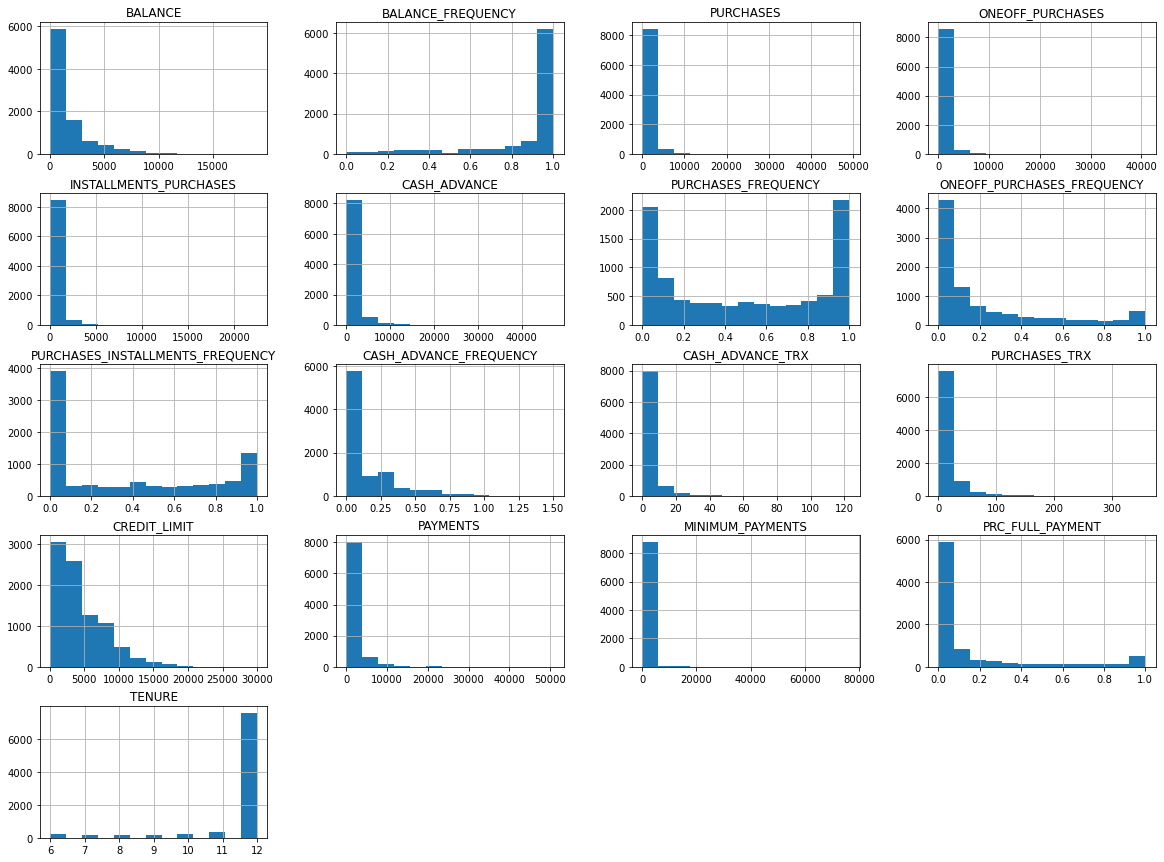

In [276]:
df.hist(bins=13, figsize=(20,15), layout=(5,4));

In [277]:
df.skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522549
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.867357
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

### Keterangan dari distribusi data

Dari nilai skewness yang diberikan, kita dapat mengambil beberapa kesimpulan:

BALANCE memiliki skewness positif (2.393386), yang menunjukkan bahwa distribusi datanya cenderung condong ke kanan. Artinya, terdapat banyak pelanggan dengan saldo yang tinggi pada kartu kredit mereka.

BALANCE_FREQUENCY memiliki skewness negatif (-2.023266), yang menunjukkan bahwa distribusi datanya cenderung condong ke kiri. Hal ini mengindikasikan bahwa sebagian besar pelanggan memiliki frekuensi penggunaan kartu kredit yang rendah.

PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_TRX, dan PAYMENTS memiliki skewness positif yang tinggi (nilai > 5). Ini menunjukkan bahwa distribusi datanya sangat condong ke kanan, menandakan adanya nilai ekstrem atau outlier pada sisi kanan distribusi.

PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, CREDIT_LIMIT, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, dan TENURE memiliki skewness yang lebih mendekati distribusi normal.

Dalam kesimpulan, nilai skewness dapat memberikan informasi tentang kecenderungan atau asimetri distribusi data. Dalam data ini, beberapa variabel memiliki distribusi yang condong ke kanan dengan nilai skewness positif yang tinggi, sementara variabel lainnya memiliki distribusi yang mendekati distribusi normal.

## Korelasi antar variabel

<AxesSubplot:>

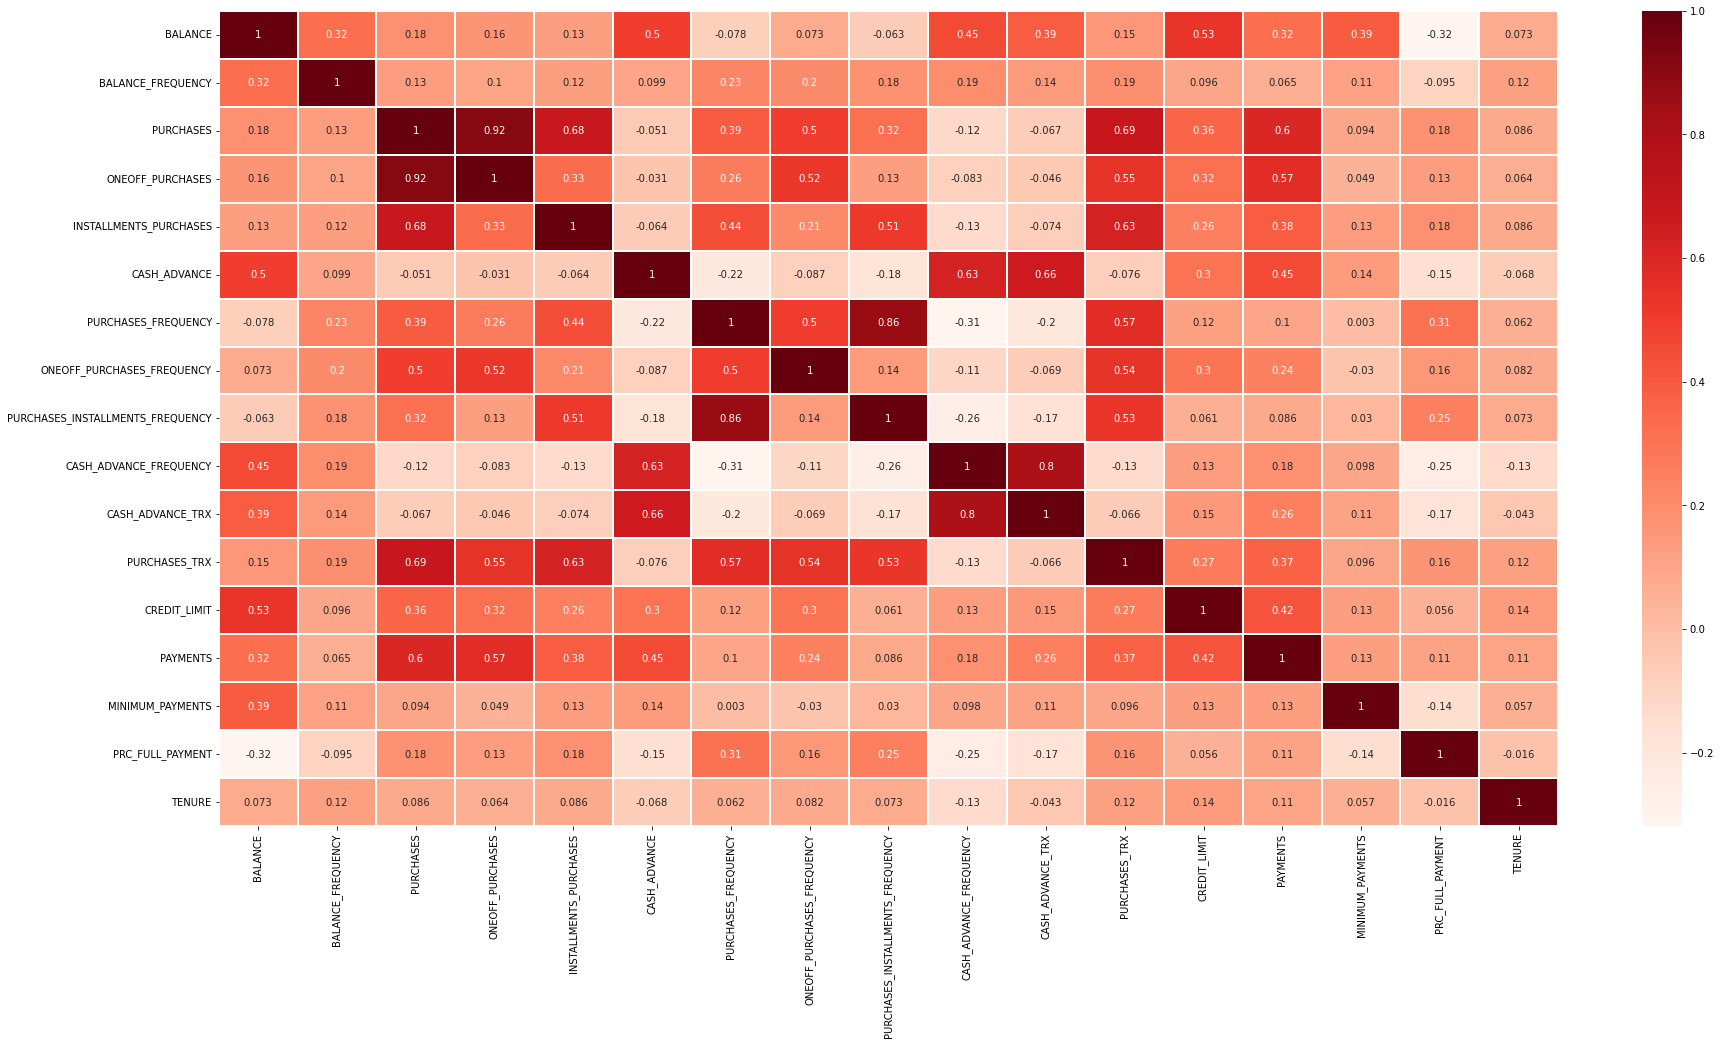

In [278]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(30,15))
sns.heatmap(corrmat, ax = ax, cmap ="Reds", linewidths = 0.1, annot = True)

### Penjelasan Korelasi Matrix

1. Korelasi Positif Kuat:
   - BALANCE dan CREDIT_LIMIT memiliki korelasi positif kuat sebesar 0.531. Ini menunjukkan bahwa semakin tinggi batas kredit yang diberikan kepada pelanggan, semakin tinggi pula saldo yang dimiliki oleh pelanggan.
   - PURCHASES dan ONEOFF_PURCHASES memiliki korelasi positif kuat sebesar 0.917. Ini menunjukkan bahwa jumlah pembelian secara keseluruhan memiliki hubungan positif yang kuat dengan jumlah pembelian satu kali (one-off purchases). Artinya, jika seorang pelanggan sering melakukan pembelian secara keseluruhan, kemungkinan besar mereka juga akan melakukan pembelian satu kali.
   - PURCHASES dan INSTALLMENTS_PURCHASES memiliki korelasi positif kuat sebesar 0.680. Ini menunjukkan bahwa jumlah pembelian secara keseluruhan memiliki hubungan positif yang kuat dengan jumlah pembelian dengan angsuran. Artinya, jika seorang pelanggan sering melakukan pembelian secara keseluruhan, kemungkinan besar mereka juga akan melakukan pembelian dengan angsuran.

2. Korelasi Positif Lemah:
   - BALANCE dan PURCHASES memiliki korelasi positif lemah sebesar 0.181. Ini menunjukkan adanya hubungan positif yang lemah antara saldo pelanggan dengan jumlah pembelian yang dilakukan oleh pelanggan tersebut.
   - BALANCE_FREQUENCY dan PURCHASES_FREQUENCY memiliki korelasi positif lemah sebesar 0.230. Ini menunjukkan adanya hubungan positif yang lemah antara frekuensi saldo pelanggan diperbarui dengan frekuensi pembelian yang dilakukan oleh pelanggan tersebut.
   - PURCHASES dan CREDIT_LIMIT memiliki korelasi positif lemah sebesar 0.357. Ini menunjukkan adanya hubungan positif yang lemah antara jumlah pembelian secara keseluruhan dengan batas kredit yang diberikan kepada pelanggan.

3. Korelasi Negatif Kuat:
   - BALANCE_FREQUENCY dan PRC_FULL_PAYMENT memiliki korelasi negatif kuat sebesar -0.318. Ini menunjukkan adanya hubungan negatif yang kuat antara frekuensi saldo pelanggan diperbarui dengan proporsi pembayaran penuh yang dilakukan oleh pelanggan tersebut. Artinya, semakin sering pelanggan melakukan pembayaran penuh, frekuensi saldo pelanggan diperbarui akan semakin rendah.
   - PRC_FULL_PAYMENT dan TENURE memiliki korelasi negatif kuat sebesar -0.165. Ini menunjukkan adanya hubungan negatif yang kuat antara proporsi pembayaran penuh yang dilakukan oleh pelanggan dengan jangka waktu berlangganan (tenure) pelanggan tersebut. Artinya, semakin lama pelanggan berlangganan, proporsi pembayaran penuh akan semakin rendah.

4. Korelasi Negatif Lemah:
   - BALANCE dan PRC_FULL_PAYMENT memiliki korelasi negatif lemah sebesar -0.319. Ini menunjukkan adanya hubungan negatif yang lemah antara saldo pelanggan dengan proporsi pembayaran penuh yang dilakukan oleh pelanggan tersebut.
   - CASH_ADVANCE dan CASH_ADVANCE_FREQUENCY memiliki korelasi negatif lemah sebesar -0.076. Ini menunjukkan adanya hubungan negatif yang lemah antara jumlah penarikan tunai dengan frekuensi penarikan tunai yang dilakukan oleh pelanggan tersebut.
   - CASH_ADVANCE_FREQUENCY dan PRC_FULL_PAYMENT memiliki korelasi negatif lemah sebesar -0.250. Ini menunjukkan adanya hubungan negatif yang lemah antara frekuensi penarikan tunai dengan proporsi pembayaran penuh yang dilakukan oleh pelanggan tersebut.

Perlu diingat bahwa korelasi hanya mengukur hubungan linier antara variabel-variabel tersebut dan tidak memberikan informasi tentang kausalitas atau hubungan non-linier.

## Deteksi Outlier

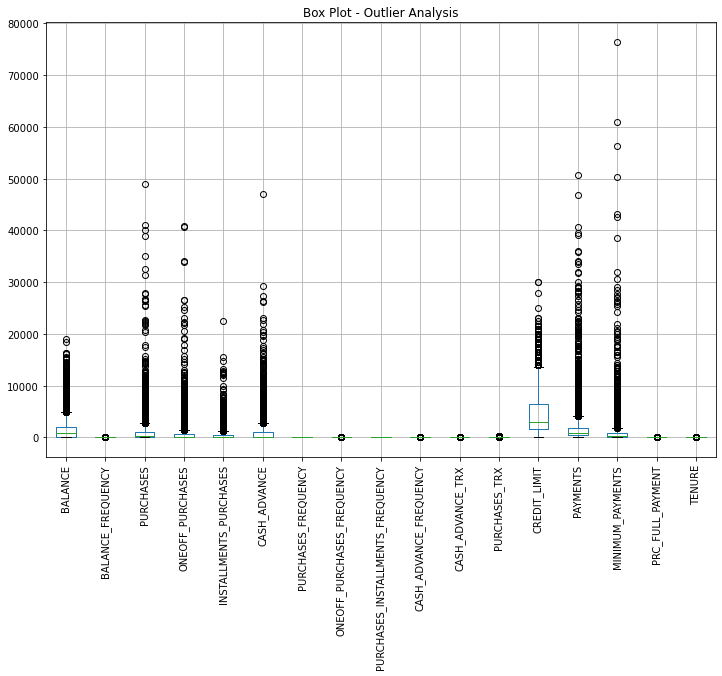

In [279]:
# Membuat box plot untuk setiap kolom
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Box Plot - Outlier Analysis')
plt.xticks(rotation=90)
plt.show()

Bisa kita lihat sangatlah banyak sekali outlier yang ada pada dataset yang diberikan. minimum paymen t memiliki nilai outlier yang sangat extreme.

# Preprocessgin Data

## Menangani outlier

### Menggunakan Interquartile Method

In [280]:
df.shape

(8950, 17)

Kita memiliki data 8950. Sekarang kita lakukan penghapusan pada outlier

In [281]:
# Menghitung nilai Q1, Q3, dan IQR untuk setiap kolom numerik
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas dan batas bawah untuk mengidentifikasi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier dari dataset
df_IQR = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

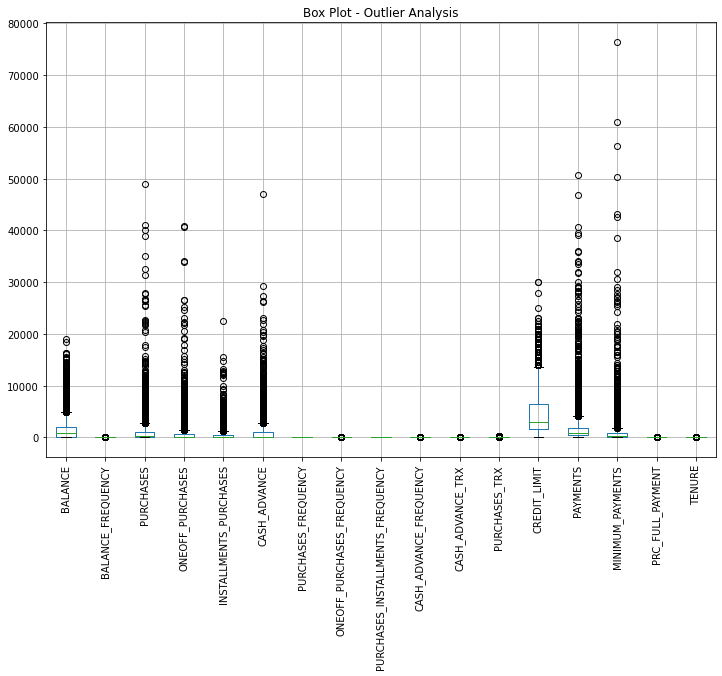

In [282]:
# Membuat box plot untuk setiap kolom
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Box Plot - Outlier Analysis')
plt.xticks(rotation=90)
plt.show()

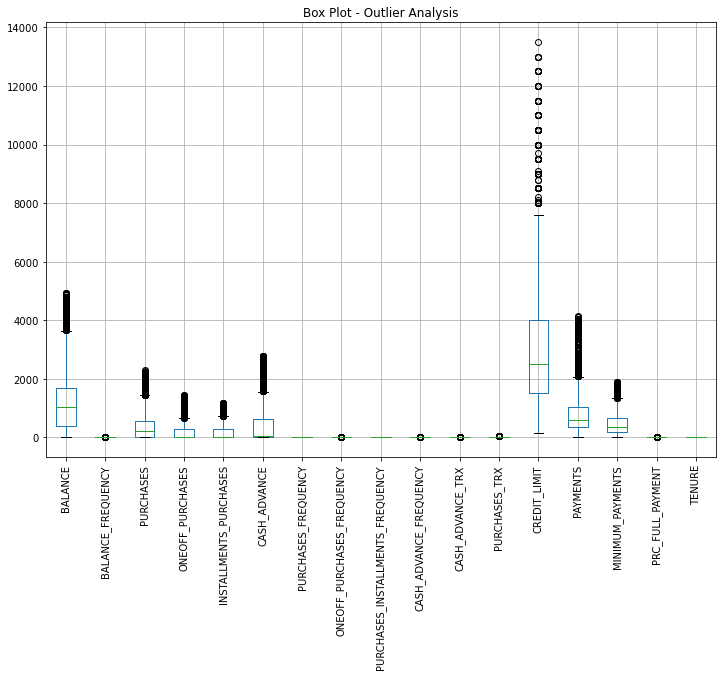

In [283]:
# Membuat box plot untuk setiap kolom
plt.figure(figsize=(12, 8))
df_IQR.boxplot()
plt.title('Box Plot - Outlier Analysis')
plt.xticks(rotation=90)
plt.show()

In [284]:
print("Data frame Sebelum di hapus outlier nya : ", df.shape)
print("Data frame Sesudah dengan IQR di hapus outlier nya : ", df_IQR.shape)
print(f"Data yang dihapus sejumlah : {8950-3008} sebesar {(8950-3008)//100}% ")

Data frame Sebelum di hapus outlier nya :  (8950, 17)
Data frame Sesudah dengan IQR di hapus outlier nya :  (3008, 17)
Data yang dihapus sejumlah : 5942 sebesar 59% 


Dikarenakan jumlah dari data yang dihilangkan melebih 50%, maka kita akan mencoba menggunakan metode lain. Kondisi ini sangat tidak baik dikarena bisa mempengaruhi informasi data data yang ada dalam dataset yang terhapus

### Menggunakan Z Score test

Metode ini melibatkan penggunaan skor Z untuk mengukur sejauh mana sebuah data berjarak dari rata-rata dalam satuan standar deviasi. Data dengan skor Z di atas atau di bawah ambang batas tertentu (biasanya 2 atau 3) dianggap sebagai outlier dan dapat dihapus.

In [285]:
# Menghitung Z-score untuk setiap data point
z_scores = np.abs(stats.zscore(df))

# Menentukan threshold
threshold = 3

# Mengidentifikasi data outlier
outlier_indices = np.where(z_scores > threshold)

# Menghapus data outlier dari DataFrame
df_Zscore = df.drop(df.index[outlier_indices[0]])


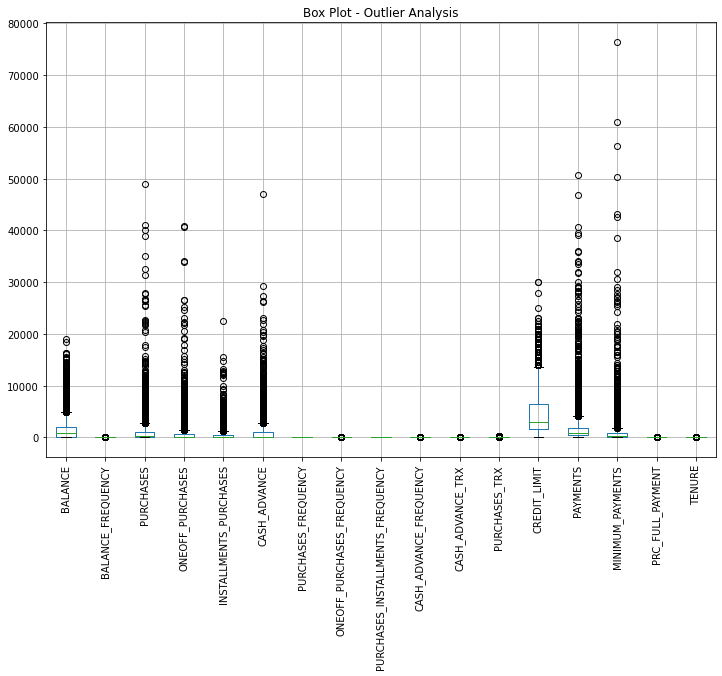

In [286]:
# Membuat box plot untuk setiap kolom
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Box Plot - Outlier Analysis')
plt.xticks(rotation=90)
plt.show()

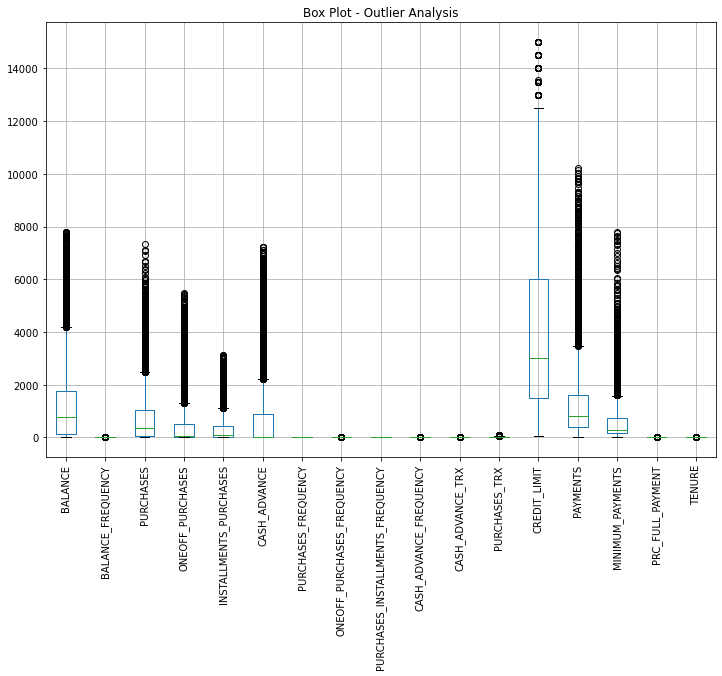

In [287]:
# Membuat box plot untuk setiap kolom
plt.figure(figsize=(12, 8))
df_Zscore.boxplot()
plt.title('Box Plot - Outlier Analysis')
plt.xticks(rotation=90)
plt.show()

In [288]:
print("Data frame Sebelum di hapus outlier nya : ", df.shape)
print("Data frame Sesudah dengan Zscore di hapus outlier nya : ", df_Zscore.shape)
print(f"Data yang dihapus sejumlah : {8950-3008} sebesar {(8950-7434)//100}% ")

Data frame Sebelum di hapus outlier nya :  (8950, 17)
Data frame Sesudah dengan Zscore di hapus outlier nya :  (7434, 17)
Data yang dihapus sejumlah : 5942 sebesar 15% 


In [289]:
df_Zscore.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Kesimpulan

Dengan memeprtimbangkan kedua metode untuk menghilangkan outlier tersebut, kita menggunakan metode Zscore. Karena data yang dihilangkan jauh lebih sedikit dari pada menggunakan IQR method yang menghapus data sebesar 59% dari data aslinya

## Sclaed Data

In [290]:
# Membuat objek scaler
scaler = MinMaxScaler()

# Melakukan min-max scaling pada data
df_scaled_data = scaler.fit_transform(df_Zscore)

# Mengubah array numpy menjadi DataFrame dengan nama fitur
df_scaled = pd.DataFrame(df_scaled_data, columns=df.columns)

In [291]:
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.005241,0.777778,0.013027,0.000000,0.030584,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,0.022472,0.063545,0.019733,0.017926,0.000000,1.0
1,0.410411,0.888889,0.000000,0.000000,0.000000,0.890885,0.000000,0.000000,0.000000,0.343750,0.173913,0.000000,0.464883,0.401212,0.137801,0.222222,1.0
2,0.319765,1.000000,0.105576,0.140652,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.134831,0.498328,0.060828,0.080608,0.000000,1.0
3,0.213591,0.555556,0.204687,0.272692,0.000000,0.028455,0.083333,0.083333,0.000000,0.114583,0.043478,0.011236,0.498328,0.000000,0.111054,0.000000,1.0
4,0.104794,1.000000,0.002185,0.002911,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.011236,0.076923,0.066330,0.031455,0.000000,1.0


# Pendefisian Model

In [292]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

# Pelatihan Model

## Clustering Feature

 Kita akan melakukan bebearapa kluster seperti dibawah ini

In [293]:
# Kombinasi 1: Purchases dan Balance Frequency
Pola_1 = df_scaled.loc[:, ["PURCHASES", "BALANCE_FREQUENCY"]]

# Kombinasi 2: Purchases dan Cash Advance
Pola_2 = df_scaled.loc[:, ["PURCHASES", "CASH_ADVANCE"]]

# Kombinasi 3: Purchases dan Credit Limit
Pola_3 = df_scaled.loc[:, ["PURCHASES", "CREDIT_LIMIT"]]

# Kombinasi 4: Purchases dan Minimum Payments
Pola_4 = df_scaled.loc[:, ["PURCHASES", "MINIMUM_PAYMENTS"]]

# Kombinasi 5: Purchases dan Tenure
Pola_5 = df_scaled.loc[:, ["PURCHASES", "TENURE"]]

# Kombinasi 6: Purchases dan Payments
Pola_6 = df_scaled.loc[:, ["PURCHASES", "PAYMENTS"]]

# Kombinasi 7: Purchases dan One-off Purchases Frequency
Pola_7 = df_scaled.loc[:, ["PURCHASES", "ONEOFF_PURCHASES_FREQUENCY"]]

# Kombinasi 8: Purchases dan Purchases Installments Frequency
Pola_8 = df_scaled.loc[:, ["PURCHASES", "PURCHASES_INSTALLMENTS_FREQUENCY"]]

# Kombinasi 9: Purchases dan Cash Advance Frequency
Pola_9 = df_scaled.loc[:, ["PURCHASES", "CASH_ADVANCE_FREQUENCY"]]

# Kombinasi 10: Purchases dan Purchase TRX
Pola_10 = df_scaled.loc[:, ["PURCHASES", "PURCHASES_TRX"]]

1. Purchases dan Balance Frequency: Pola Pembelian dan Frekuensi Pembaruan Saldo
Clustering ini dapat membantu mengidentifikasi pola pembelian pelanggan berdasarkan jumlah pembelian yang dilakukan dan seberapa sering mereka memperbarui saldo akun mereka.


2. Purchases dan Cash Advance: Pola Pembelian dan Penarikan Tunai
Clustering ini akan mempertimbangkan jumlah pembelian yang dilakukan dan jumlah uang muka yang diberikan oleh pelanggan. Tujuannya bisa menjadi untuk melihat hubungan antara pola pembelian pelanggan dan penggunaan fasilitas penarikan tunai.


3. Purchases dan Credit Limit: Pola Pembelian dan Batas Kredit
Dalam kombinasi ini, kita akan membandingkan jumlah pembelian pelanggan dengan batas kredit mereka. Clustering dapat membantu mengidentifikasi pola pembelian pelanggan berdasarkan sejauh mana mereka memanfaatkan batas kredit mereka.


4. Purchases dan Minimum Payments: Pola Pembelian dan Pembayaran Minimum
Clustering ini akan mempertimbangkan jumlah pembelian pelanggan dan jumlah pembayaran minimum yang mereka lakukan. Tujuannya bisa menjadi untuk melihat hubungan antara pola pembelian pelanggan dan sejauh mana mereka memenuhi kewajiban pembayaran minimum.


5. Purchases dan Tenure: Pola Pembelian dan Masa Penggunaan Kartu Kredit
Dalam kombinasi ini, kita akan membandingkan jumlah pembelian pelanggan dengan masa penggunaan kartu kredit mereka. Clustering dapat membantu mengidentifikasi pola pembelian pelanggan berdasarkan sejauh mana mereka telah menggunakan kartu kredit dalam jangka waktu tertentu.


6. Purchases dan Payments: Pola Pembelian dan Pembayaran
Clustering ini akan mempertimbangkan jumlah pembelian yang dilakukan oleh pelanggan dan jumlah pembayaran yang mereka lakukan. Tujuannya bisa menjadi untuk melihat pola pembelian dan kecenderungan pelanggan untuk melakukan pembayaran yang lebih besar atau lebih kecil.


7. Purchases dan One-off Purchases Frequency: Pola Pembelian dan Frekuensi Pembelian Sekali Bayar
Kombinasi ini akan membandingkan jumlah pembelian yang dilakukan oleh pelanggan dengan frekuensi pembelian sekali bayar yang mereka lakukan. Tujuannya bisa menjadi untuk mengidentifikasi pelanggan yang cenderung melakukan pembelian sekali bayar secara rutin atau jarang.


8. Purchases dan Purchases Installments Frequency: Pola Pembelian dan Frekuensi Pembelian dengan Cicilan
Dalam kombinasi ini, kita akan membandingkan jumlah pembelian yang dilakukan oleh pelanggan dengan frekuensi pembelian dengan cicilan yang mereka lakukan. Tujuannya bisa menjadi untuk melihat pola pembelian dan kecenderungan pelanggan untuk melakukan pembelian dengan cicilan.


9. Purchases dan Cash Advance Frequency: Pola Pembelian dan Frekuensi Penarikan Tunai
Clustering ini akan mempertimbangkan jumlah pembelian yang dilakukan oleh pelanggan dengan frekuensi penarikan tunai yang mereka lakukan. Tujuannya bisa menjadi untuk melihat hubungan antara pola pembelian dan sejauh mana pelanggan cenderung menggunakan fasilitas penarikan tunai.


10. Purchases dan Purchase TRX: Pola Pembelian dan Jumlah Transaksi Pembelian
Dalam kombinasi ini, kita akan membandingkan jumlah pembelian yang dilakukan oleh pelanggan dengan jumlah transaksi pembelian yang mereka lakukan. Clustering dapat membantu mengidentifikasi pola pembelian pelanggan berdasarkan sejauh mana mereka aktif dalam melakukan transaksi pembelian.

## Membuat Function untuk clustering

In [294]:
def clustering_kmeans(X):
    wcss = []  # List untuk menyimpan Within-Cluster Sum of Squares (WCSS)
    silhouette_scores = []  # List untuk menyimpan nilai silhouette score
    best_score = -1  # Inisialisasi nilai silhouette score terbaik
    best_n_clusters = -1  # Inisialisasi jumlah cluster terbaik

    # Menghitung WCSS untuk setiap jumlah cluster dari 1 hingga 10
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Plotting grafik Elbow Method
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

    range_n_clusters = range(2, 10)

    # Melakukan iterasi untuk setiap jumlah cluster dalam range_n_clusters
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters)
        preds = kmeans.fit_predict(X)
        centers = kmeans.cluster_centers_

        # Menghitung nilai silhouette score
        score = silhouette_score(X, preds)
        silhouette_scores.append(score)
        print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

        # Memperbarui nilai silhouette score terbaik dan jumlah cluster terbaik jika ditemukan yang lebih baik
        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters

    # Menampilkan hasil silhouette score terbaik dan jumlah cluster terbaik
    print("Best Silhouette Score: {}".format(best_score))
    print("Best Number of Clusters: {}".format(best_n_clusters))


In [295]:
def grafik_clustering(X, n_best):
    # Melakukan clustering dengan K-means
    kmeans = KMeans(n_clusters=n_best, random_state=0)

    # Menentukan label cluster untuk setiap data point
    labels = kmeans.fit_predict(X)

    # Menampilkan hasil clustering
    plt.figure(figsize=(20, 10))

    # Visualisasi pola pembelian
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title("Clustering {}".format(X.columns[0] + " vs " + X.columns[1]))

    # Membuat legend berdasarkan jumlah kluster dengan urutan 0 di bawah
    legend_labels = ["Cluster " + str(i) for i in range(n_best)][::-1]  # Reverse the order of labels
    plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

    plt.show()


## Pola 1

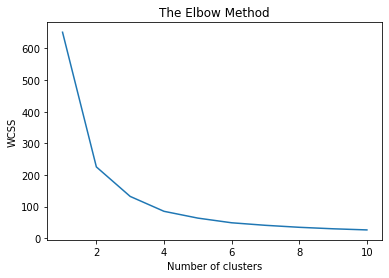

For n_clusters = 2, silhouette score is 0.7104137064426073
For n_clusters = 3, silhouette score is 0.6151578161900125
For n_clusters = 4, silhouette score is 0.6323833399353745
For n_clusters = 5, silhouette score is 0.5857274120900224
For n_clusters = 6, silhouette score is 0.5867695934231646
For n_clusters = 7, silhouette score is 0.5479388208594461
For n_clusters = 8, silhouette score is 0.5695863738183388
For n_clusters = 9, silhouette score is 0.5499182960583799
Best Silhouette Score: 0.7104137064426073
Best Number of Clusters: 2


In [296]:
clustering_kmeans(Pola_1)

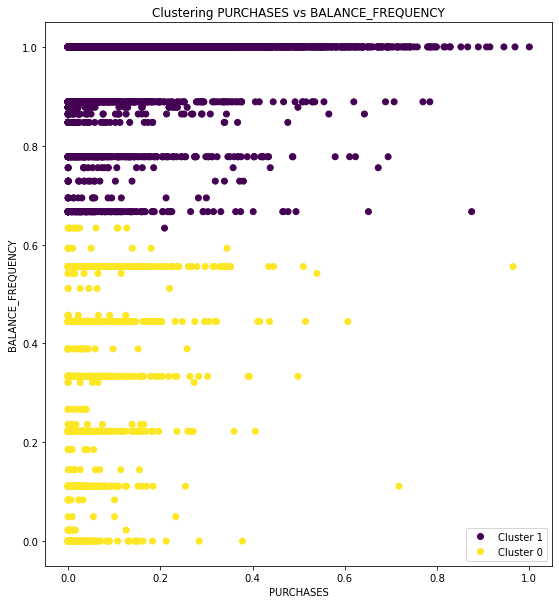

In [297]:
grafik_clustering(Pola_1,2)

## Pola 2

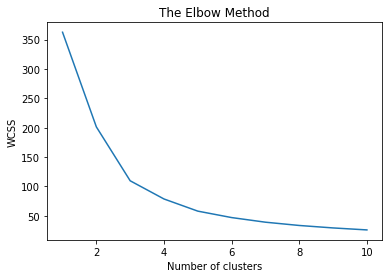

For n_clusters = 2, silhouette score is 0.6012811996820558
For n_clusters = 3, silhouette score is 0.5971810868574841
For n_clusters = 4, silhouette score is 0.5628913439339893
For n_clusters = 5, silhouette score is 0.5423691087453925
For n_clusters = 6, silhouette score is 0.5376131000099569
For n_clusters = 7, silhouette score is 0.5089061558256652
For n_clusters = 8, silhouette score is 0.5190543151443558
For n_clusters = 9, silhouette score is 0.5182335942465943
Best Silhouette Score: 0.6012811996820558
Best Number of Clusters: 2


In [298]:
clustering_kmeans(Pola_2)

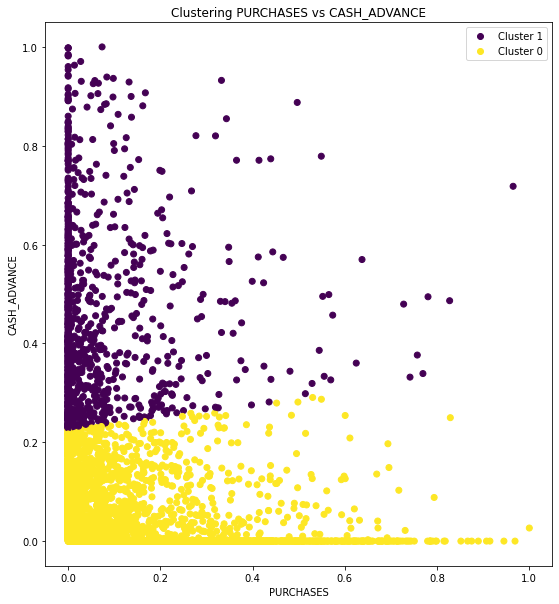

In [299]:
grafik_clustering(Pola_2,2)

## Pola 3

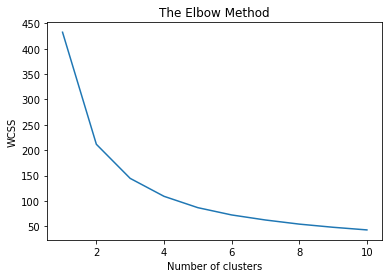

For n_clusters = 2, silhouette score is 0.5326848263486476
For n_clusters = 3, silhouette score is 0.5514601457032248
For n_clusters = 4, silhouette score is 0.48180382207863764
For n_clusters = 5, silhouette score is 0.4830119799644783
For n_clusters = 6, silhouette score is 0.4178745613538038
For n_clusters = 7, silhouette score is 0.426220008088632
For n_clusters = 8, silhouette score is 0.4320264261900837
For n_clusters = 9, silhouette score is 0.4133069842729554
Best Silhouette Score: 0.5514601457032248
Best Number of Clusters: 3


In [300]:
clustering_kmeans(Pola_3)

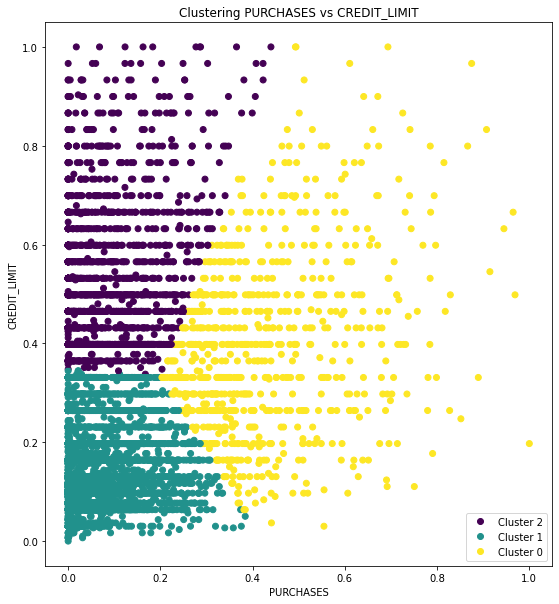

In [301]:
grafik_clustering(Pola_3,3)

## Pola 4

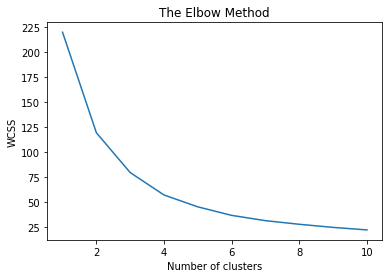

For n_clusters = 2, silhouette score is 0.611856272932559
For n_clusters = 3, silhouette score is 0.6152983043874625
For n_clusters = 4, silhouette score is 0.5388757549405375
For n_clusters = 5, silhouette score is 0.4893329101097885
For n_clusters = 6, silhouette score is 0.477748042414834
For n_clusters = 7, silhouette score is 0.46349344176836954
For n_clusters = 8, silhouette score is 0.4431574533466123
For n_clusters = 9, silhouette score is 0.442468885142708
Best Silhouette Score: 0.6152983043874625
Best Number of Clusters: 3


In [302]:
clustering_kmeans(Pola_4)

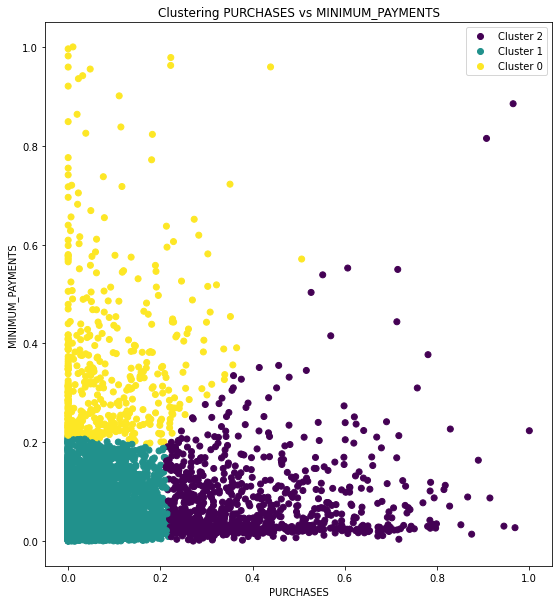

In [303]:
grafik_clustering(Pola_4,3)

## Pola 5

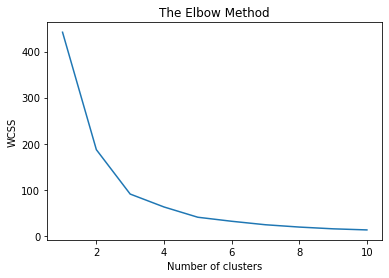

For n_clusters = 2, silhouette score is 0.7836676770785184
For n_clusters = 3, silhouette score is 0.6834766791436103
For n_clusters = 4, silhouette score is 0.7065337258658656
For n_clusters = 5, silhouette score is 0.6627787894316791
For n_clusters = 6, silhouette score is 0.6327283187711976
For n_clusters = 7, silhouette score is 0.6443597569599406
For n_clusters = 8, silhouette score is 0.6523770447710814
For n_clusters = 9, silhouette score is 0.6262742763983948
Best Silhouette Score: 0.7836676770785184
Best Number of Clusters: 2


In [304]:
clustering_kmeans(Pola_5)

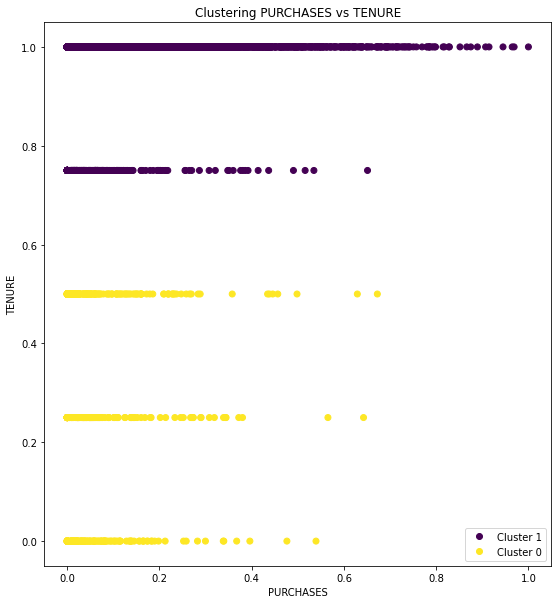

In [305]:
grafik_clustering(Pola_5,2)

## Pola 6

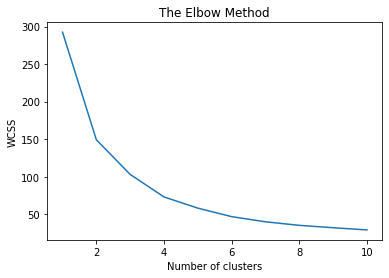

For n_clusters = 2, silhouette score is 0.6315662793517216
For n_clusters = 3, silhouette score is 0.6380133389505374
For n_clusters = 4, silhouette score is 0.5374982140990007
For n_clusters = 5, silhouette score is 0.5449596774457971
For n_clusters = 6, silhouette score is 0.4937480053147724
For n_clusters = 7, silhouette score is 0.46597768692998903
For n_clusters = 8, silhouette score is 0.45761915970799616
For n_clusters = 9, silhouette score is 0.41813281090174714
Best Silhouette Score: 0.6380133389505374
Best Number of Clusters: 3


In [306]:
clustering_kmeans(Pola_6)

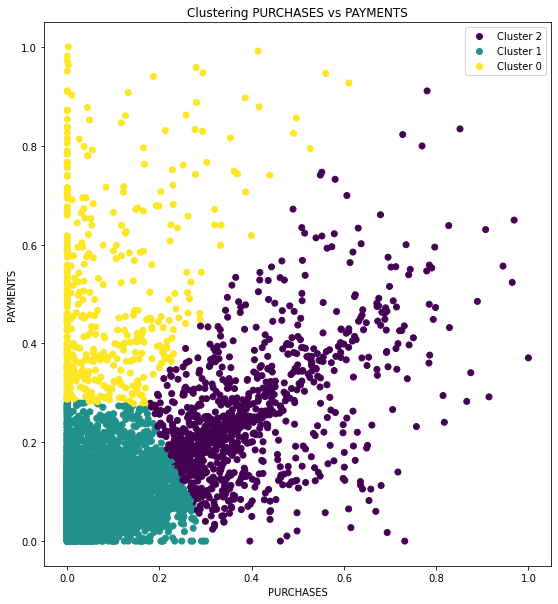

In [307]:
grafik_clustering(Pola_6,3)

## Pola 7

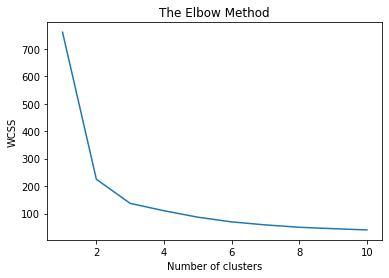

For n_clusters = 2, silhouette score is 0.711473385173095
For n_clusters = 3, silhouette score is 0.6291871582917248
For n_clusters = 4, silhouette score is 0.558832364444543
For n_clusters = 5, silhouette score is 0.5588314422212501
For n_clusters = 6, silhouette score is 0.5757803533022313
For n_clusters = 7, silhouette score is 0.561949742590078
For n_clusters = 8, silhouette score is 0.54763006300331
For n_clusters = 9, silhouette score is 0.54127521126411
Best Silhouette Score: 0.711473385173095
Best Number of Clusters: 2


In [308]:
clustering_kmeans(Pola_7)

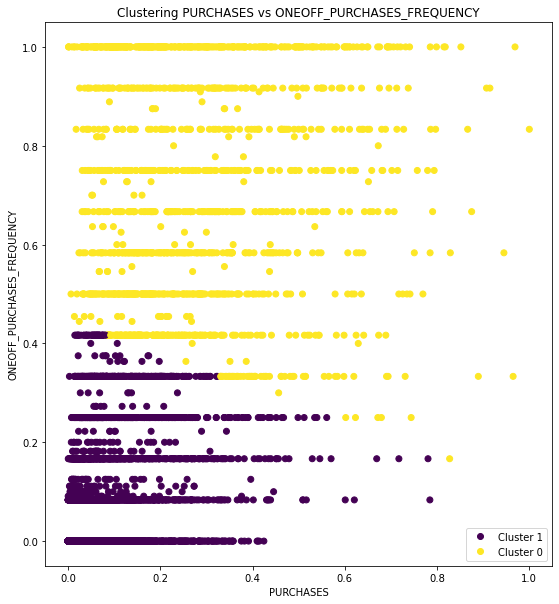

In [309]:
grafik_clustering(Pola_7,2)

## Pola 8

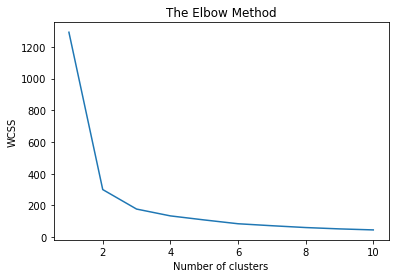

For n_clusters = 2, silhouette score is 0.6826535521748665
For n_clusters = 3, silhouette score is 0.6291485745002341
For n_clusters = 4, silhouette score is 0.6236532931203979
For n_clusters = 5, silhouette score is 0.6224530325133635
For n_clusters = 6, silhouette score is 0.6047042971739213
For n_clusters = 7, silhouette score is 0.5931241157101715
For n_clusters = 8, silhouette score is 0.5917860621257256
For n_clusters = 9, silhouette score is 0.5933630673131959
Best Silhouette Score: 0.6826535521748665
Best Number of Clusters: 2


In [310]:
clustering_kmeans(Pola_8)

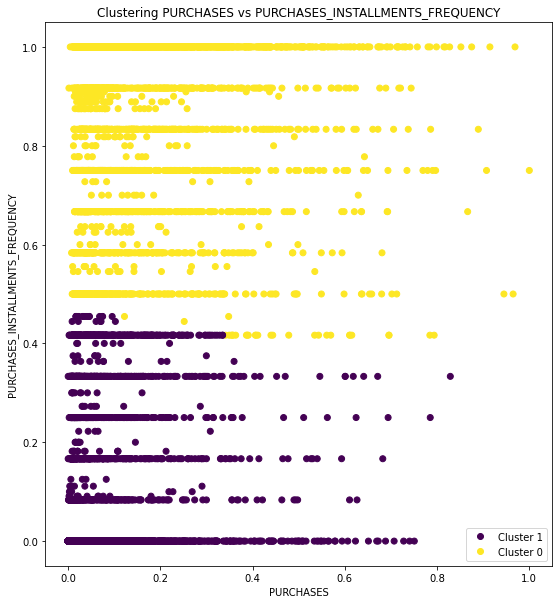

In [311]:
grafik_clustering(Pola_8,2)

## Pola 9

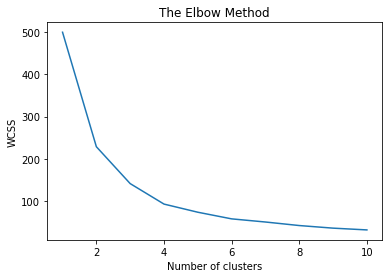

For n_clusters = 2, silhouette score is 0.5877881137471528
For n_clusters = 3, silhouette score is 0.5571404958135993
For n_clusters = 4, silhouette score is 0.5634509052060079
For n_clusters = 5, silhouette score is 0.5243394489961961
For n_clusters = 6, silhouette score is 0.5388654486165583
For n_clusters = 7, silhouette score is 0.5281024491248423
For n_clusters = 8, silhouette score is 0.5432069345397416
For n_clusters = 9, silhouette score is 0.5418568275256925
Best Silhouette Score: 0.5877881137471528
Best Number of Clusters: 2


In [312]:
clustering_kmeans(Pola_9)

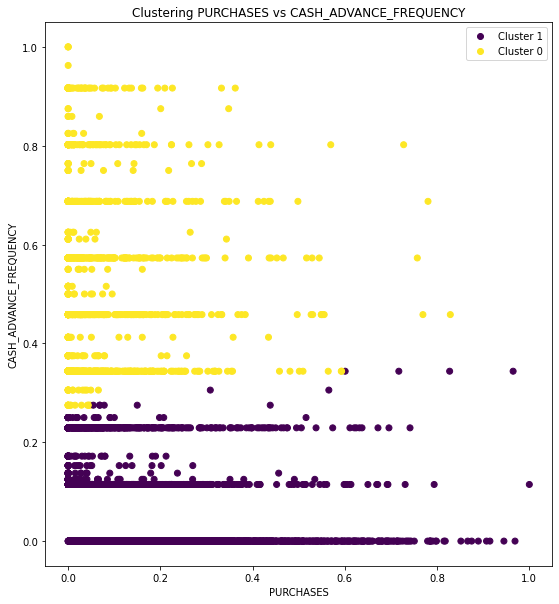

In [313]:
grafik_clustering(Pola_9,2)

## Pola 10

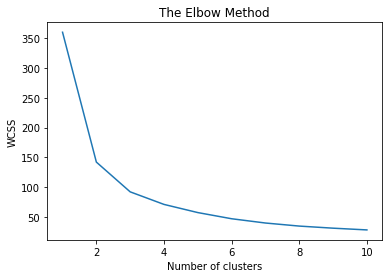

For n_clusters = 2, silhouette score is 0.6633695499570909
For n_clusters = 3, silhouette score is 0.560404369276728
For n_clusters = 4, silhouette score is 0.5012612471085955
For n_clusters = 5, silhouette score is 0.5086967272858111
For n_clusters = 6, silhouette score is 0.5086254628454567
For n_clusters = 7, silhouette score is 0.517373162604293
For n_clusters = 8, silhouette score is 0.5177079756156924
For n_clusters = 9, silhouette score is 0.5130034434501801
Best Silhouette Score: 0.6633695499570909
Best Number of Clusters: 2


In [314]:
clustering_kmeans(Pola_10)

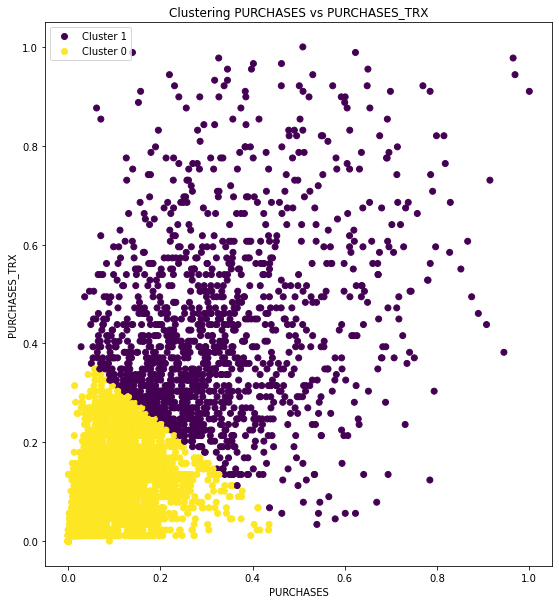

In [315]:
grafik_clustering(Pola_10,2)